In [3]:
# Another AI generated code snippet & Explanation: Mthokozisi

HIV Transmission and Intervention Model
I've created a modified version of the original infection model that's specifically designed to simulate HIV transmission and test various intervention strategies. Here are the key changes and features:
HIV-Specific Characteristics Added

Disease Progression Stages:

Expanded the disease states from 3 (SIR) to 6 states:

Susceptible
HIV+ Untreated
HIV+ Treated
AIDS Untreated
AIDS Treated
Dead




Realistic Timeline:

Models the long-term nature of HIV (average ~10 years progression from infection to AIDS without treatment)
Uses daily time steps for more accurate modeling


Treatment Effects:

Includes testing rates (people discovering their status)
Treatment reduces transmission by ~96% (reflecting U=U principle: Undetectable = Untransmittable)
Treatment slows progression to AIDS and reduces mortality


Transmission Dynamics:

Variable transmission rates based on disease stage (higher in early infection and AIDS stage)
Condom use reduces transmission by ~95%
Sexual encounters modeled probabilistically


Data Collection:

Tracks prevalence, incidence (new infections), and mortality
Allows for comparison across different intervention scenarios



Testing Interventions
The model includes functions to test and compare different intervention strategies:

Baseline: 20% treatment coverage, 50% condom use
Increased Treatment: 90% treatment coverage, standard condom use
Increased Prevention: Standard treatment, 90% condom use
Combined Approach: 90% treatment coverage, 90% condom use

You can easily modify the parameters to test other scenarios like:

Pre-Exposure Prophylaxis (PrEP) by giving susceptible people protection
Behavioral interventions that reduce risky encounters
Education campaigns that increase testing rates

How to Use the Model
To run a specific intervention scenario:
python# Run a 20-year simulation with 2000 people
simulation_data = run_model_with_params(years=20, population=2000, treatment_coverage=0.5, condom_use=0.7)

# Plot the results
plot_hiv_results(simulation_data, "Custom HIV Intervention Scenario")
To compare multiple interventions:
pythonresults = compare_interventions()
Would you like me to explain any specific part of the model in more detail, or would you like to see additional features added to better simulate HIV transmission?

In [2]:
# Ethaton Attempt

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import random

# Define the states of the agents
class State:
    SUSCEPTIBLE = 0
    INFECTED = 1
    RECOVERED = 2

# Define the agent class
class HIVAgent:
    """An agent in the HIV infection model."""
    
    def __init__(self, unique_id, model):
        self.unique_id = unique_id
        self.model = model
        self.state = State.SUSCEPTIBLE
        self.infection_time = 0
        self.pos = None  # Position in the network graph

    def step(self):
        """Agent's step in the model."""
        if self.state == State.INFECTED:
            self.infect_neighbors()
            self.check_recovery()

    def infect_neighbors(self):
        """Infect neighboring agents."""
        neighbors = list(self.model.graph.neighbors(self.pos))
        for neighbor_id in neighbors:
            neighbor = self.model.agents[neighbor_id]
            if neighbor.state == State.SUSCEPTIBLE:
                if random.random() < self.model.ptrans:
                    neighbor.state = State.INFECTED
                    neighbor.infection_time = self.model.time

    def check_recovery(self):
        """Check if the agent recovers."""
        if self.model.time - self.infection_time >= self.model.recovery_time:
            self.state = State.RECOVERED

# Define the model class
class HIVModel:
    """A model for HIV infection spread."""
    
    def __init__(self, N, ptrans, recovery_time):
        self.num_agents = N
        self.ptrans = ptrans
        self.recovery_time = recovery_time
        self.time = 0  # Manual time step tracking

        self.graph = nx.erdos_renyi_graph(N, 0.1)
        self.agents = []

        # Create and assign agents to nodes
        for node in self.graph.nodes():
            agent = HIVAgent(node, self)
            agent.pos = node
            self.agents.append(agent)

        # Infect a random agent at the start
        initial_infected = random.choice(self.agents)
        initial_infected.state = State.INFECTED
        initial_infected.infection_time = 0

        # Data collection
        self.data = []

    def step(self):
        """Advance the model by one step."""
        random.shuffle(self.agents)  # Randomize activation
        for agent in self.agents:
            agent.step()

        # Data collection
        for agent in self.agents:
            self.data.append({
                "Step": self.time,
                "AgentID": agent.unique_id,
                "State": agent.state
            })
        self.time += 1

# Parameters
N = 100  # Number of agents
ptrans = 0.1  # Probability of transmission
recovery_time = 10  # Time until recovery

# Create and run the model
model = HIVModel(N, ptrans, recovery_time)
steps = 50
for i in range(steps):
    model.step()

# Convert collected data to DataFrame
data = pd.DataFrame(model.data)

# Plot the results
plt.figure(figsize=(10, 6))
for state, label in zip([State.SUSCEPTIBLE, State.INFECTED, State.RECOVERED],
                        ['Susceptible', 'Infected', 'Recovered']):
    count_by_step = data[data['State'] == state].groupby('Step').size()
    plt.plot(count_by_step, label=label)

plt.xlabel('Time Steps')
plt.ylabel('Number of Agents')
plt.title('HIV Infection Spread Simulation')
plt.legend()
plt.tight_layout()
plt.show()

# check this code for data set number 4 it links SIR and agent based

In [ ]:
# Another Attempt: Ethaton

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import NetworkGrid
from mesa.datacollection import DataCollector

# Define the states of the agents
class State:
    SUSCEPTIBLE = 0
    INFECTED = 1
    RECOVERED = 2

# Define the agent class
class HIVAgent(Agent):
    """An agent in the HIV infection model."""
    
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.state = State.SUSCEPTIBLE
        self.infection_time = 0

    def step(self):
        """Agent's step in the model."""
        if self.state == State.INFECTED:
            self.infect_neighbors()
            self.check_recovery()

    def infect_neighbors(self):
        """Infect neighboring agents."""
        neighbors = self.model.grid.get_neighbors(self.pos, include_center=False)
        for neighbor in self.model.grid.get_cell_list_contents(neighbors):
            if neighbor.state == State.SUSCEPTIBLE:
                if self.random.random() < self.model.ptrans:
                    neighbor.state = State.INFECTED
                    neighbor.infection_time = self.model.schedule.time

    def check_recovery(self):
        """Check if the agent recovers."""
        if self.model.schedule.time - self.infection_time >= self.model.recovery_time:
            self.state = State.RECOVERED

# Define the model class
class HIVModel(Model):
    """A model for HIV infection spread."""
    
    def __init__(self, N, ptrans, recovery_time):
        self.num_agents = N
        self.ptrans = ptrans
        self.recovery_time = recovery_time
        self.schedule = RandomActivation(self)

        G = nx.erdos_renyi_graph(N, 0.1)
        self.grid = NetworkGrid(G)
        self.datacollector = DataCollector(
            agent_reporters={"State": "state"}
        )

        # Create agents
        for i in range(self.num_agents):
            agent = HIVAgent(i, self)
            self.schedule.add(agent)
            self.grid.place_agent(agent, i)

        # Infect a random agent at the start
        initial_infected = self.random.choice(self.schedule.agents)
        initial_infected.state = State.INFECTED
        initial_infected.infection_time = 0

    def step(self):
        """Advance the model by one step."""
        self.datacollector.collect(self)
        self.schedule.step()

# Parameters
N = 100  # Number of agents
ptrans = 0.1  # Probability of transmission
recovery_time = 10  # Time until recovery

# Create the model
model = HIVModel(N, ptrans, recovery_time)

# Run the model
steps = 50
for i in range(steps):
    model.step()

# Collect data for visualization
data = model.datacollector.get_agent_vars_dataframe()

# Plot the results
plt.figure(figsize=(10, 6))
for state, label in zip([State.SUSCEPTIBLE, State.INFECTED, State.RECOVERED],
                        ['Susceptible', 'Infected', 'Recovered']):
    count_by_step = data[data['State'] == state].groupby('Step').size()
    plt.plot(count_by_step, label=label)

plt.xlabel('Time Steps')
plt.ylabel('Number of Agents')
plt.title('HIV Infection Spread Simulation')
plt.legend()
plt.tight_layout()
plt.show()

# awe can u plix check if this will run on ur pc my mesa has a few problems

/opt/miniconda3/envs/swordfish/lib/python3.9/site-packages/mesa/agent.py:52: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  self.model.register_agent(self)
/tmp/ipykernel_6566/481115999.py:77: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  initial_infected_agents = random.sample(self.schedule.agents, num_to_infect)


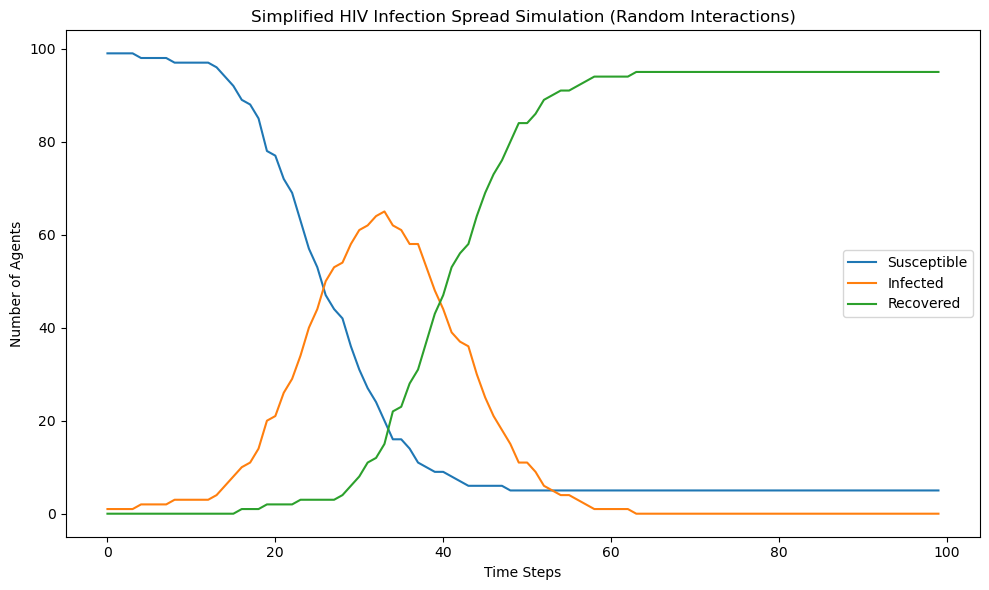

In [6]:
# Third attempt: Ethaton - Working Model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.datacollection import DataCollector
import random

# Define the states of the agents
class State:
    SUSCEPTIBLE = 0
    INFECTED = 1
    RECOVERED = 2

# Define the agent class
class HIVAgent(Agent):
    """An agent in the HIV infection model."""

    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.state = State.SUSCEPTIBLE
        self.infection_time = 0

    def step(self):
        """Agent's step in the model."""
        if self.state == State.INFECTED:
            self.interact_randomly() # Modified method name
            self.check_recovery()

    def interact_randomly(self):
        """Interact with a random agent and potentially infect them."""
        # Get a list of all agents excluding self
        other_agents = [agent for agent in self.model.schedule.agents if agent != self]

        # If there are other agents, select one randomly to interact with
        if other_agents:
            chosen_agent = self.random.choice(other_agents) # Select ONE random agent per step

            # Check if the chosen agent is susceptible and attempt infection
            if chosen_agent.state == State.SUSCEPTIBLE:
                if self.random.random() < self.model.ptrans:
                    chosen_agent.state = State.INFECTED
                    chosen_agent.infection_time = self.model.schedule.time


    def check_recovery(self):
        """Check if the agent recovers."""
        if self.state == State.RECOVERED: # Already recovered, do nothing
            return
        if self.state == State.INFECTED: # Only check recovery if infected
            if self.model.schedule.time - self.infection_time >= self.model.recovery_time:
                self.state = State.RECOVERED

# Define the model class
class HIVModel(Model):
    """A simplified model for HIV infection spread with random interactions."""

    def __init__(self, N, ptrans, recovery_time, initial_infected_count=1):
        self.num_agents = N
        self.ptrans = ptrans
        self.recovery_time = recovery_time
        self.schedule = RandomActivation(self)
        self.datacollector = DataCollector(
            agent_reporters={"State": "state"}
        )

        # Create agents
        for i in range(self.num_agents):
            agent = HIVAgent(i, self)
            self.schedule.add(agent)

        # Infect a specified number of random agents at the start
        # Ensure we don't try to infect more agents than exist
        num_to_infect = min(initial_infected_count, N)
        initial_infected_agents = random.sample(self.schedule.agents, num_to_infect)
        for agent in initial_infected_agents:
             agent.state = State.INFECTED
             agent.infection_time = 0 # Infection starts at time 0


    def step(self):
        """Advance the model by one step."""
        self.datacollector.collect(self)
        self.schedule.step()

# Parameters
N = 100  # Number of agents
ptrans = 0.2 # Probability of transmission *per interaction* (adjusted)
recovery_time = 15 # Time until recovery (adjusted)
initial_infected_count = 1 # Number of agents initially infected

# Create the model
model = HIVModel(N, ptrans, recovery_time, initial_infected_count)

# Run the model
steps = 100 # Increased steps to see the dynamics over time
for i in range(steps):
    model.step()

# Collect data for visualization
data = model.datacollector.get_agent_vars_dataframe()

# Plot the results
plt.figure(figsize=(10, 6))
for state, label in zip([State.SUSCEPTIBLE, State.INFECTED, State.RECOVERED],
                        ['Susceptible', 'Infected', 'Recovered']):
    # Count the number of agents in each state at each step
    count_by_step = data[data['State'] == state].groupby('Step').size()
    # Reindex to include all steps, filling missing values with 0 (no agents in that state)
    count_by_step = count_by_step.reindex(range(steps), fill_value=0)
    plt.plot(count_by_step, label=label)

plt.xlabel('Time Steps')
plt.ylabel('Number of Agents')
plt.title('Simplified HIV Infection Spread Simulation (Random Interactions)')
plt.legend()
plt.tight_layout()
plt.show()

# here is the updated version which makes use of random interaction instead of just considering interaction between susceptible and infected